## validation 

In [1]:


from stock_reader import reader
import os
import pandas as pd
import numpy as np
import talib

Enter Code or Symbol :  005930
Enter start date(YYYY-MM--DD) :  20070101
Enter end date(YYYY-MM--DD) :  20200428



     Symbol  Name          Sector
951  005930  삼성전자  통신 및 방송 장비 제조업

             open   high    low  close    volume    change
Date                                                      
2007-01-02  12400  12540  12320  12500    355265  0.019576
2007-01-03  12540  12560  12220  12220    394730 -0.022400
2007-01-04  12220  12240  12060  12140    381464 -0.006547
2007-01-05  12160  12180  11900  11900    586649 -0.019769
2007-01-08  11840  11880  11580  11640    682494 -0.021849
...           ...    ...    ...    ...       ...       ...
2020-04-22  48700  50000  48350  49850  18613864  0.012183
2020-04-23  50200  50300  49500  49850  18754442  0.000000
2020-04-24  49650  49750  49000  49350  15618347 -0.010030
2020-04-27  49350  50000  49100  49850  14049471  0.010132
2020-04-28  49850  50100  49300  49550   9644397 -0.006018

[3291 rows x 6 columns]


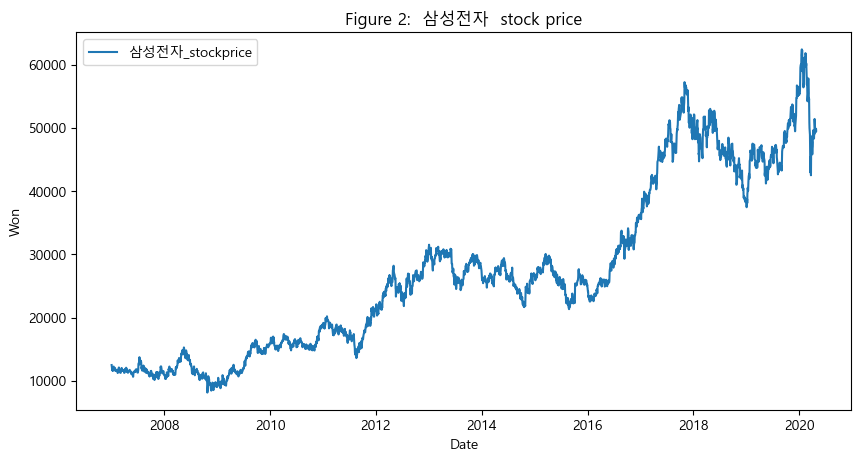


There are 3291 number of days in the dataset.



In [65]:
df = reader()

In [3]:
#df=df[::-1]

In [66]:
df=df.reset_index(drop=True)
df.rename(columns={"final":"close","vol":"volume"}, inplace = True)
df

,open,high,low,close,volume,change
0,12400,12540,12320,12500,355265,0.019576
1,12540,12560,12220,12220,394730,-0.022400
2,12220,12240,12060,12140,381464,-0.006547
3,12160,12180,11900,11900,586649,-0.019769
4,11840,11880,11580,11640,682494,-0.021849
...,...,...,...,...,...,...
3286,48700,50000,48350,49850,18613864,0.012183
3287,50200,50300,49500,49850,18754442,0.000000
3288,49650,49750,49000,49350,15618347,-0.010030
3289,49350,50000,49100,49850,14049471,0.010132


In [69]:
def Indicators(df): # date close open high low volume 컬럼순 
                    # 결측치 33줄 생김 0~32 까지
    df['sma5'] = talib.SMA(np.asarray(df['close']), 5)
    df['sma20'] = talib.SMA(np.asarray(df['close']), 20)
    #df['sma120'] = talib.SMA(np.asarray(df['close']), 120)
    df['ema12'] = talib.SMA(np.asarray(df['close']), 12)
    df['ema26'] = talib.SMA(np.asarray(df['close']), 26)
    upper, middle, lower = talib.BBANDS(np.asarray(df['close']), timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    df['dn'] = lower
    df['mavg'] = middle
    df['up'] = upper
    df['pctB'] = (df.close - df.dn)/(df.up - df.dn)
    rsi14 = talib.RSI(np.asarray(df['close']), 14)
    df['rsi14'] = rsi14
    macd, macdsignal, macdhist = talib.MACD(np.asarray(df['close']), 12, 26, 9)  
    df['macd'] = macd
    df['macdsignal'] = macdsignal
    df['obv']=talib.OBV(df['close'], df['volume'])
    df['ad'] = talib.AD(df['high'], df['low'], df['close'], df['volume'])
    df['ADOSC'] = talib.ADOSC(df['high'], df['low'], df['close'], df['volume'], fastperiod=3, slowperiod=10)
    df['log']=np.log(df['close'] / df['close'].shift(1))
    return df

In [70]:
df[['close','open','high','low','volume']]=df[['close','open','high','low','volume']].astype(float)
#df=Indicators(df)

In [71]:
df.loc[32:33]

,open,high,low,close,volume,change,sma5,sma20,ema12,ema26,...,mavg,up,pctB,rsi14,macd,macdsignal,obv,ad,ADOSC,log
32,11620.0,11640.0,11380.0,11480.0,629396.0,0.012346,11440.0,11670.0,11576.666667,11751.538462,...,11670.0,12067.894458,0.261243,39.926406,NaN,NaN,-1017177.0,-3.035047e+06,-696489.509985,0.012270
33,11560.0,11840.0,11480.0,11800.0,856061.0,0.027875,11460.0,11675.0,11595.000000,11757.692308,...,11675.0,12076.771079,0.655561,49.389211,-121.67931,-123.993157,-161116.0,-2.369221e+06,-458863.280686,0.027493


In [165]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler,RobustScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

look_back = 1
def create_dataset(dataset, look_back=50):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back)].values.tolist()
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back]['close'])
    return np.array(dataX), np.array(dataY)

df=df.iloc[33:]
df=df.fillna(0)
#df=df.drop(columns=['date'])
nptf=np.array(df)

In [166]:
np.random.seed(7)

In [167]:

# normalization
Xscaler = RobustScaler()
Yscaler = RobustScaler()
Xscaler.fit(nptf)
Yscaler.fit(nptf[:,3].reshape(-1,1))
print(nptf)
print(nptf[:,3])
nptf = pd.DataFrame(Xscaler.transform(nptf),columns=df.columns)
print(nptf)

In [ ]:
# split train, test
train_size = int(len(nptf) * 0.95)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))
 
# create dataset for learning
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print()

In [168]:


 
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1],nptf.shape[1]))
testX = np.reshape(testX, (testX.shape[0],  testX.shape[1],nptf.shape[1]))
 
# simple lstm network learning
model = Sequential()
model.add(LSTM(128, input_shape=(look_back, nptf.shape[1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mae'])
model.summary()
 

3001 158
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 128)               76800     
_________________________________________________________________
dense_51 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_52 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 17        
Total params: 81,473
Trainable params: 81,473
Non-trainable params: 0
_________________________________________________________________


In [2]:
print(len(trainX.shape[1])
,len(nptf.shape[1]))

NameError: name 'trainX' is not defined

In [169]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1) # early_stop 
model.fit(trainX, trainY, epochs=100, batch_size=512, verbose=1,callbacks=[early_stop])

Epoch 1/100
2999/2999 [==============================] - 2s 665us/step - loss: 0.2356 - mean_absolute_error: 0.3797
Epoch 2/100
2999/2999 [==============================] - 0s 10us/step - loss: 0.0917 - mean_absolute_error: 0.2333
Epoch 3/100
2999/2999 [==============================] - 0s 9us/step - loss: 0.0322 - mean_absolute_error: 0.1407
Epoch 4/100
2999/2999 [==============================] - 0s 10us/step - loss: 0.0153 - mean_absolute_error: 0.0999
Epoch 5/100
2999/2999 [==============================] - 0s 10us/step - loss: 0.0133 - mean_absolute_error: 0.0926
Epoch 6/100
2999/2999 [==============================] - 0s 9us/step - loss: 0.0087 - mean_absolute_error: 0.0733
Epoch 7/100
2999/2999 [==============================] - 0s 10us/step - loss: 0.0057 - mean_absolute_error: 0.0603
Epoch 8/100
2999/2999 [==============================] - 0s 10us/step - loss: 0.0043 - mean_absolute_error: 0.0503
Epoch 9/100
2999/2999 [==============================] - 0s 9us/step - loss: 0.00

In [170]:

# make prediction
testPredict = model.predict(testX)
testPredict = Yscaler.inverse_transform(testPredict)
testY = Yscaler.inverse_transform(testY.reshape(-1,1))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % testScore)

Train Score: 8215.31 RMSE


In [171]:
score = model.evaluate(testX,testY , batch_size=512)

print("MSE : ",score)

156/156 [==============================] - 1s 4ms/step
MSE :  [2805632000.0, 52770.22265625]


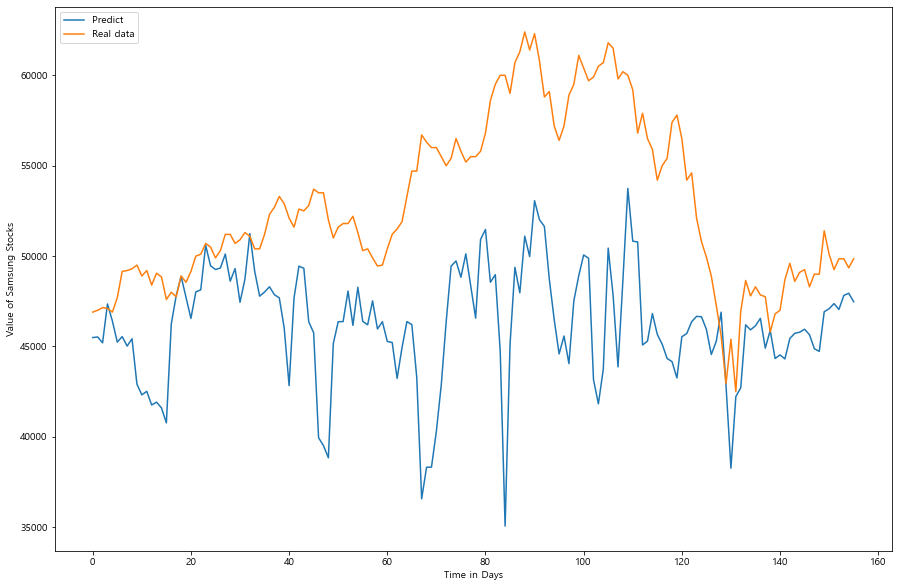

In [172]:

# plot
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(testPredict, label = 'Predict')
plt.plot(testY, label = 'Real data')
plt.xlabel('Time in Days')
plt.ylabel('Value of Samsung Stocks')
plt.legend(loc = 'upper left')
plt.show()

In [173]:
from sklearn.externals import joblib 
# 객체를 pickled binary file 형태로 저장한다 
file_name = 'Xscale.pkl' 
joblib.dump(Xscaler, file_name) 
file_name = 'Yscale.pkl' 
joblib.dump(Yscaler, file_name)

['Yscale.pkl']

In [174]:
from keras.models import load_model
model.save('LSTM.h5')

In [175]:
xs=joblib.load('Xscale.pkl')
ys=joblib.load('Yscale.pkl')
LSTM = load_model('LSTM.h5')

In [176]:
# make prediction
tp = LSTM.predict(testX)
tp = ys.inverse_transform(tp)

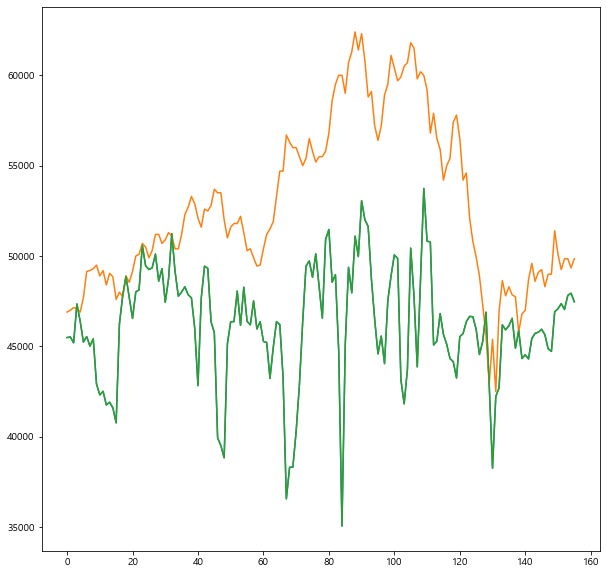

In [177]:

# plot
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(testPredict)
plt.plot(testY)
plt.plot(tp)
plt.show()

In [178]:
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)-1):
        a = dataset.iloc[i].values.tolist()
        dataX.append(a)
        dataY.append(dataset.iloc[i+1]['close'])
    return np.array(dataX), np.array(dataY)

In [27]:
nptf

,open,high,low,close,volume,change,sma5,sma20,ema12,ema26,dn,mavg,up,pctB,rsi14,macd,macdsignal,obv,ad,ADOSC
0,1.636259,1.675086,1.656577,1.676640,92.976024,0.343819,1.496979,1.289876,1.312879,1.267056,1.115370,1.289876,1.409491,1.307427,1.101721,0.918190,-1.228387,54.004062,-16.260926,-81.906081
1,1.688222,1.680827,1.650757,1.653625,87.576570,-1.896482,1.558564,1.305867,1.339994,1.278332,1.090993,1.305867,1.459599,1.071832,1.015806,1.475571,-0.675146,51.162475,-16.922915,-72.349855
2,1.792148,1.807118,1.802095,1.785961,53.791507,-1.047815,1.634673,1.333488,1.386652,1.296114,1.059143,1.333488,1.537370,1.184937,1.272841,2.193306,-0.084229,52.919990,-18.069342,-67.988014
3,1.855658,1.853042,1.831199,1.860759,62.519080,0.324651,1.716012,1.365471,1.461403,1.314655,1.030863,1.365471,1.620063,1.140945,1.402434,2.899530,0.534451,54.957548,-15.768976,-47.735666
4,1.693995,1.830080,1.708964,1.837745,71.493656,1.681859,1.777597,1.399198,1.520031,1.332654,1.028927,1.399198,1.683398,0.961226,1.309088,3.369449,1.126507,52.632019,-12.482265,-17.554942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,-0.786374,-0.794489,-0.795111,-0.795167,1.015905,-1.017878,-0.800604,-0.801303,-0.803596,-0.778202,-0.805474,-0.801303,-0.770741,-0.291610,-0.134429,0.138536,0.224772,0.253512,0.918678,-0.170328
3253,-0.767898,-0.777268,-0.776484,-0.780207,0.735422,-0.921005,-0.802463,-0.800837,-0.803694,-0.777204,-0.804945,-0.800837,-0.770343,0.262462,0.287503,0.147974,0.213024,0.308599,0.828845,-0.822541
3254,-0.764434,-0.773823,-0.767171,-0.766398,0.134964,-0.304992,-0.796653,-0.799267,-0.802130,-0.776250,-0.803656,-0.799267,-0.768575,0.722436,0.614592,0.185871,0.211458,0.344419,0.822355,-1.050070
3255,-0.745958,-0.755454,-0.757858,-0.761795,0.173786,-1.043560,-0.788984,-0.797407,-0.799590,-0.774949,-0.802130,-0.797407,-0.766478,0.814765,0.715159,0.224999,0.218290,0.381484,0.761910,-1.371392


In [179]:
nptf = pd.DataFrame(nptf,columns=df.columns)

In [180]:
# split train, test
train_size = int(len(nptf) * 0.95)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))
 
# create dataset for learning
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

3001 158


In [181]:
import lightgbm as lgb
train_ds = lgb.Dataset(trainX, label = trainY) 
test_ds = lgb.Dataset(testX, label = testY) 

In [182]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [183]:
params = {'learning_rate': 0.01,
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse'
          }

In [184]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 0.23584
[200]	valid_0's l2: 0.0493968
[300]	valid_0's l2: 0.0188888
[400]	valid_0's l2: 0.0122532
[500]	valid_0's l2: 0.0104431
[600]	valid_0's l2: 0.00977922
[700]	valid_0's l2: 0.00966351
[800]	valid_0's l2: 0.00956112
[900]	valid_0's l2: 0.00954164
Early stopping, best iteration is:
[872]	valid_0's l2: 0.00950288


In [185]:
file_name = 'lgb2.pkl' 
joblib.dump(model, file_name) 

['lgb2.pkl']

In [186]:
predict_test = model.predict(testX)

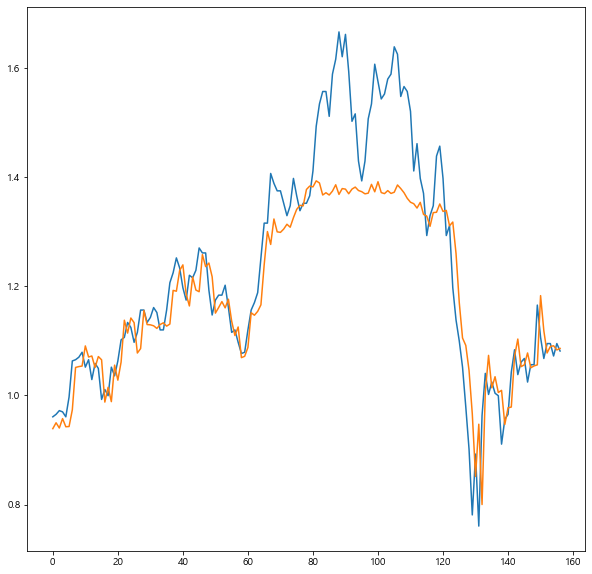

In [187]:
# plot
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(testY)
plt.plot(predict_test)
plt.show()

In [188]:
import xgboost
model = xgboost.XGBRegressor(learning_rate=0.1,
                             max_depth=5,
                             n_estimators=100) 
model.fit(trainX,trainY)

[14:00:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [189]:
file_name = 'xgb.pkl' 
joblib.dump(model, file_name) 

['xgb.pkl']

In [190]:
predict_test = model.predict(testX)

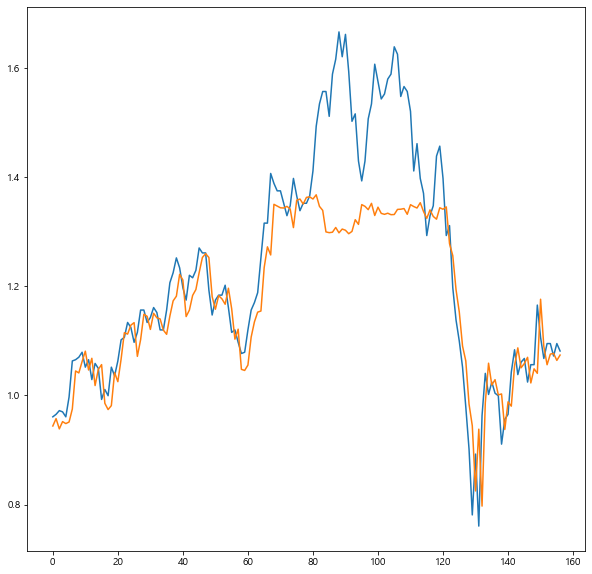

In [191]:
#plot
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(testY)
#plt.plot(testY)
plt.plot(predict_test)
plt.show()

#Traiding

In [304]:
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['close']

signals=signals[-testPredict.shape[0]:]
signals['predict'] = testPredict
signals.loc[signals['predict'] < signals.trend, 'signal'] = -1 # 매도 
signals.loc[signals['predict'] >= signals.trend * 1.007, 'signal'] = 1 #매수
signals

,signal,trend,predict
3135,-1.0,47000.0,45491.101562
3136,-1.0,47150.0,45526.609375
3137,-1.0,47100.0,45200.929688
3138,1.0,46900.0,47352.328125
3139,-1.0,47700.0,46407.320312
...,...,...,...
3286,-1.0,49850.0,47369.398438
3287,-1.0,49850.0,47046.726562
3288,-1.0,49350.0,47823.000000
3289,-1.0,49850.0,47943.214844


In [305]:
print(signals['trend'].iloc[-1])
signals.reset_index(drop=True, inplace=True) # reindex
signals


49550.0


,signal,trend,predict
0,-1.0,47000.0,45491.101562
1,-1.0,47150.0,45526.609375
2,-1.0,47100.0,45200.929688
3,1.0,46900.0,47352.328125
4,-1.0,47700.0,46407.320312
...,...,...,...
151,-1.0,49850.0,47369.398438
152,-1.0,49850.0,47046.726562
153,-1.0,49350.0,47823.000000
154,-1.0,49850.0,47943.214844


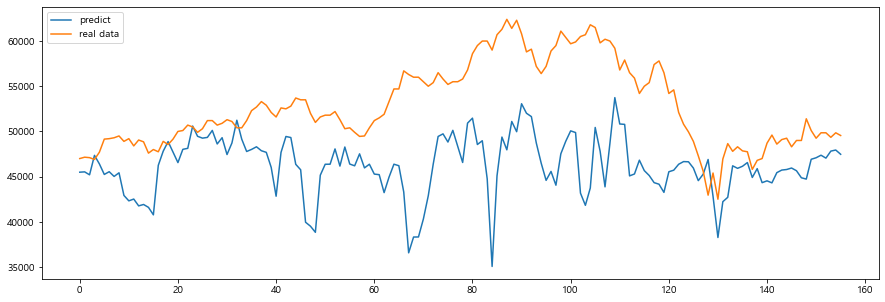

In [306]:
plt.figure(figsize = (15,5))
plt.plot(signals['predict'],label='predict')
plt.plot(signals['trend'],label='real data')
plt.legend(loc = 'upper left')

In [337]:
def buy_stock( ## 클래스로 바꿔야할듯 
    real_movement,
    signal,
    predict,
    initial_money = 10000000,
    max_buy = 200,
    max_sell = 100,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    global 평단가,거래금
    states_real_buy=[]
    states_real_sell=[]
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0
    평단가 = 0
    거래금 = 0

    def buy(i, initial_money, current_inventory):
        global 평단가, 거래금
        
        shares = initial_money // real_movement[i]
        if shares < 1: # 가지고 있는 돈이 주가보다 낮을 경우 
            print(
                'day %d: 현재 잔고 : %d, 매수금이 부족합니다. 현재 주가 : %d'
                % (i, initial_money, real_movement[i])
            )
        else: # 가지고 있는 돈이 살수 있는 주가보다 높을 경우 
            states_real_buy.append(i) 
           # if shares > max_buy: 
            if predict[i] > real_movement[i] * 1.015 : 
                buy_units = min(shares , max_buy*3) # 수익률이 1.5% 이상이면 300주 매수 
            elif predict[i] > real_movement[i] * 1.01 : 
                buy_units = min(shares , max_buy*2) # 수익률이 1% 이상이면 200주 매수
            elif predict[i] > real_movement[i] * 1.007 : 
                buy_units = min(shares , max_buy*1) # 수익률이 0.7% 이상이면 100주 매수 
            else:
                buy_units = 0
                states_real_buy.pop(-1)
                #buy_units = shares # 살수 있는 만큼 산다. 
            initial_money -= buy_units * real_movement[i]
            거래금 += buy_units * real_movement[i]
            
            current_inventory += buy_units
            평단가 = 거래금 // current_inventory
            
            print(
                'day %d: 주문수량 : %d 주문수량 * 매수가 : %d, 현재 잔고 : %d, 주식 보유량 : %d, 평단가 :%0.2f '
                % (i, buy_units, buy_units * real_movement[i], initial_money, current_inventory,평단가)
            )
            states_buy.append(0) # 주식을 샀을 경우 0을 붙혀줌
            ####
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(signals))):
        state = signal[i]
        if state == 1: ##########signal 1 매수 
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
            #### 시그널 1일때 날짜를 붙혀줌
        elif state == -1: ########### signal -1 매도
            if current_inventory == 0:
                    print('day %d: 보유량이 없어서 매도를 하지 않았습니다' % (i))
            else:
                states_real_sell.append(i)
               # if current_inventory > max_sell: 
                ### 평단가에 따른 분할 매도 진행  (수익률이 0.7 )
                if real_movement[i] > 평단가 *1.015 : 
                    sell_units = min(current_inventory,max_sell*3) # 수익률이 1.5% 이상이면 300주 매도                                                          
                elif real_movement[i] > 평단가*1.01 :
                    sell_units = min(current_inventory,max_sell*2) # 수익률이 1% 이상이면 200주 매도 
                elif real_movement[i] > 평단가*1.007 :
                    sell_units = min(current_inventory,max_sell*1) # 수익률이 0.7% 이상이면 100주 매도
                else: 
                    sell_units = 0
                    states_real_sell.pop(-1)
                    
              #  else:
               #     sell_units = current_inventory                  
                current_inventory -= sell_units # 판다
                거래금 -= sell_units * real_movement[i]
                평단가 = 거래금 // current_inventory
                
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = ( 
                        np.log(real_movement[i] / real_movement[states_buy[-1]])
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, 매도량 : %d 매도가 : %d, 수익률: %0.2f %%, 현재 잔고 : %d, 주식 보유량 : %d, 평단가 : %0.2f'
                    % (i, sell_units, total_sell, invest, initial_money, current_inventory, 평단가)
                )
            states_sell.append(i)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest, current_inventory,states_real_buy,states_real_sell

In [336]:
states_buy, states_sell, total_gains, invest,current_inventory,states_real_buy,states_real_sell = buy_stock(signals['trend'], signals['signal'], signals['predict'])

day 0: 보유량이 없어서 매도를 하지 않았습니다
day 1: 보유량이 없어서 매도를 하지 않았습니다
day 2: 보유량이 없어서 매도를 하지 않았습니다
day 3: 주문수량 : 200 주문수량 * 매수가 : 9380000, 현재 잔고 : 620000, 주식 보유량 : 200, 평단가 :46900.00 
day 4, 매도량 : 200 매도가 : 9540000, 수익률: 1.691372 %, 현재 잔고 : 10160000, 주식 보유량 : 0, 평단가 : nan
day 5: 보유량이 없어서 매도를 하지 않았습니다
day 6: 보유량이 없어서 매도를 하지 않았습니다
day 7: 보유량이 없어서 매도를 하지 않았습니다
day 8: 보유량이 없어서 매도를 하지 않았습니다
day 9: 보유량이 없어서 매도를 하지 않았습니다
day 10: 보유량이 없어서 매도를 하지 않았습니다
day 11: 보유량이 없어서 매도를 하지 않았습니다
day 12: 보유량이 없어서 매도를 하지 않았습니다
day 13: 보유량이 없어서 매도를 하지 않았습니다
day 14: 보유량이 없어서 매도를 하지 않았습니다
day 15: 보유량이 없어서 매도를 하지 않았습니다
day 16: 보유량이 없어서 매도를 하지 않았습니다
day 17: 보유량이 없어서 매도를 하지 않았습니다
day 19: 보유량이 없어서 매도를 하지 않았습니다
day 20: 보유량이 없어서 매도를 하지 않았습니다
day 21: 보유량이 없어서 매도를 하지 않았습니다
day 22: 보유량이 없어서 매도를 하지 않았습니다
day 24: 보유량이 없어서 매도를 하지 않았습니다
day 25: 보유량이 없어서 매도를 하지 않았습니다
day 26: 보유량이 없어서 매도를 하지 않았습니다
day 27: 보유량이 없어서 매도를 하지 않았습니다
day 28: 보유량이 없어서 매도를 하지 않았습니다
day 29: 보유량이 없어서 매도를 하지 않았습니다
day 30: 보유량이 없어서 매도를 하지 않았습니다
day 31: 보유량이 없어서 매도를 하지 

#signal

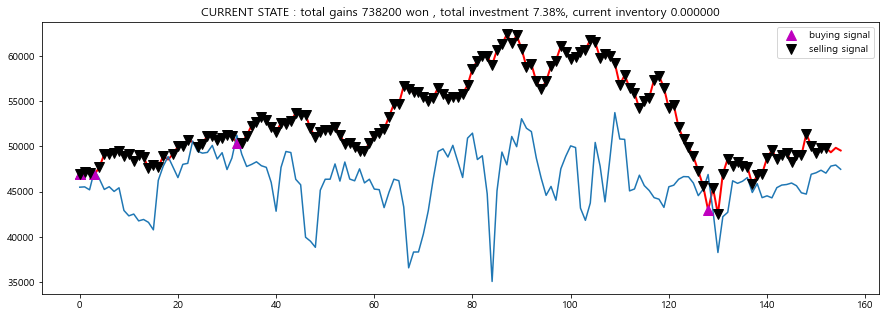

currnet profit(in value) :  738200.0


In [324]:
close = signals['trend']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(signals['predict'])
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('CURRENT STATE : total gains %d won , total investment %0.2f%%, current inventory %f'%(total_gains, invest, current_inventory))
plt.legend()
plt.show()

profit = (close.iloc[-1]*current_inventory)+total_gains
print("currnet profit(in value) : ", profit)

#실제거래


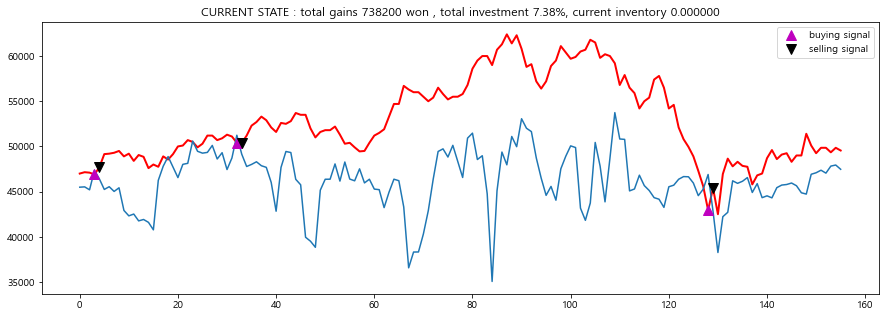

currnet profit(in value) :  738200.0


In [330]:
close = signals['trend']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(signals['predict'])
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_real_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_real_sell)
plt.title('CURRENT STATE : total gains %d won , total investment %0.2f%%, current inventory %f'%(total_gains, invest, current_inventory))
plt.legend()
plt.show()

profit = (close.iloc[-1]*current_inventory)+total_gains
print("currnet profit(in value) : ", profit)

In [1]:
nparr = df['close'].values[::].reshape(-1,1)
nparr.astype('float32')    
print("nparr :",nparr.shape)

NameError: name 'df' is not defined

In [ ]:
# normalization
scaler = MinMaxScaler(feature_range=(0, 1))
nptf = scaler.fit_transform(nparr)
print(nptf.shape)

# split train, test
train_size = int(len(nptf) * 0.9)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))

# create dataset for learning
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print("trainX :",trainX.shape,"trainY :",trainY.shape,"testX :",testX.shape,"testY :",testY.shape ,"(행,열,피처)")
    
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[2])) # trainX.shape[1] --> [2] 로 바꿈 )
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[2]))

